# Regresión logística.
### José Falcón


Comenzaremos a estudiar "Clasificación" empezando por la "regresión logística". En los algoritmos de clasificación (a diferencia de los regresión en donde se asociaba un número real a una entrada) cada entrada se le asigna un  elemento de un subconjunto finito de los naturales, es decir, una función  $f:\mathbb{R}^d \rightarrow{A}$, en donde $A \subset \mathbb{N}$. ESte tipo de algoritmos corresponden al "aprendizaje supervisado", ya que para generar el modelo necesitamos tener datos etiquetados, es decir, de lo que sepamos cual es su valor de salida.

![](http://deciphertoknow.com/wp-content/uploads/2018/07/3_Clusters_500_points-447x270.png)


![](http://deciphertoknow.com/wp-content/uploads/2018/07/randome_pts_kmeans_op.png)

En el caso de la "Regresión logística" tenemos una función $h$ de $\mathbb{R}^d$ al intervalo $[0,1]$. Podemos interpretar $h(\boldsymbol{x})$ como la probabilidad de que la etiqueta de $\boldsymbol{x}$ sea $1$. La clase de hipótesis (o espacio de hipotesis) asociado a la regresión logística es la composición de una función sigmoide $\phi_{sig}: \mathbb{R} \rightarrow [0,1]$ sobre el conjunto de funciones afines $L_d$. En particular, la función sigmoide utilizada en la regresión logística es la "función logística", definida como:
$$\phi_{sig}(z) = \frac{1}{1+e^{-z}}$$

El espacio de hipótesis es por lo tanto (la función o clase de hipótesis):
$$H_{sig} = \phi_{sig}\circ L_d = \{  \boldsymbol{x} \rightarrow \phi_{sig}(\boldsymbol{w} \cdot  \boldsymbol{x} + b) : \boldsymbol{w} \in \mathbb{R}^d , b \in \mathbb{R}\}$$

Nótese que cuando $\boldsymbol{w} \cdot  \boldsymbol{x} + b$ es muy grande entonces $\phi_{sig}(\boldsymbol{w} \cdot  \boldsymbol{x} + b)$ es cercano a $1$, mientras que cuando $\boldsymbol{w} \cdot  \boldsymbol{x} + b$ es muy pequeño entonces $\phi_{sig}(\boldsymbol{w} \cdot  \boldsymbol{x}+b)$ es cercano a $0$ 

La explicación de arriba se hizo para cuando tenemos solamente un dato $\boldsymbol{x}$, pero nosotros estaremos ingresando a la vez todos los datos, por lo que en lugar de un vector $\boldsymbol{x} \in \mathbb{R}^d$ tendremos una matriz $X \in \mathbb{R}^{n \times d}$, entonces nuestra función queda de la siguiente forma:
$$H_{sig} =  \phi_{sig}\circ L_d = \phi_{sig}(Xw+\bar{b})$$ 

con  $w \in \mathbb{R}^d$, $\bar{b} = (b,b,\dots,b)^T,b\in \mathbb{R}, \bar{b}\in \mathbb{R}^d$ y $\phi_{sig}$ se aplica entrada a entrada.


![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/66/Funci%C3%B3n_sigmoide_01.svg/1280px-Funci%C3%B3n_sigmoide_01.svg.png)

Como podemos ver en la imagen de arriba, la gráfica de la función sigmoide tiene forma de "S", y de ahí su nombre. 

En el caso de la regresión logística se dice que es un clasificador lineal, ya que separa a los datos mediante una recta, plano e hiperplano para arrojar a que categoría pertenecen, y es por eso que este clasificador es binario. Veamos un ejemplo

![](https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fttsuchi.github.io%2Fnotebooks%2Fimages%2FPerceptron%2Fclassification.png&f=1&nofb=1)

En este caso decimos que los datos son linealmente separables ya que al dividirlos con una recta se clasifican correctamente, pero no todos los datos son así

![](https://miro.medium.com/max/1786/1*q3oqM2j4HOs6ntxZ_OakFw.png)

En la imagen de arriba podemos ver distintos tipos de conjutnos de datos de datos, de donde notamos que no todos son linealmente separables.

En el caso de la regresión logística, el plano (hiperplano) o recta que separa a los datos está dado cuando $Xw + \bar{b} = 0$, ya que en $0$ la función sigmoide vale $0.5$, entonces se pueden tomar que los valores que estan por encima del plano (hiperplano) o recta se les asocie $1$ (ya que la probabilidad de ser uno es $\geq 0.5$), mientras los que están debajo se les asocia un cero (ya que la probabilidad de ser uno es $< 0.5$)

Entonces necesitamos encontrar los valores de las entradas de $w$, y para eso tenemos que utilizar una función de error o costo (como en el caso de regresión lineal) y minimizarla. En esta caso construiremos una función de error para la regresión logística llamada "Binary Cross-Entropy".

Consideremos un predictor $\boldsymbol{x}$ y una variable binaria o de Bernoulli $y$. Asumiendo que existe relación entre $\boldsymbol{x}$ y $y$ un modelo "ideal" predeciría:
$$P(y|\boldsymbol{x}) = (1\, sí\, y=1),\, (0 \, sí\, y=0)$$

Al usar la regresión logística, está probabilidad desconocida se modela como:

$$\hat{P}(y=1|\boldsymbol{x},\boldsymbol{w}) = \frac{1}{1+e^{-Xw}}$$

Nuestra meta es encontrar los parámetros $w$ tales que la porbabilidad modelada sea tan cercana como sea posible al uno verdadero.


Una forma forma de asegurar que tan bueno es calcular la función de verosimilitud (likelihood function). Dadas $n$ muestras, esta función está definida como:
$$L(\boldsymbol{w}) = \prod_{i=1}^n \hat{P}(y_i|\boldsymbol{x_i};\boldsymbol{w})$$

Idealmente buscamos encontrar los parámetros $\boldsymbol{w}$ que maximicen $L(\boldsymbol{w})$. Esto es muchas veces complicado de hacer directamente, pero podemos trabajar con el logaritmo para simplificar las cosas

$$-log L(\boldsymbol{w}) = -log\left(\prod_{i=1}^n \hat{P}(y_i|\boldsymbol{x_i};\boldsymbol{w})\right) ... (1)$$

Ya que la función logaritmo es una función monótona, minimizar esta función con logaritmo es equivalente a maximizar la función original.
Ahora calculamos $\hat{P}(y|\boldsymbol{x}, \boldsymbol{w})$
Sabemos que:
    $$\hat{P}(1, \boldsymbol{x} ; \boldsymbol{w}) = 1- \hat{P}(0\boldsymbol{x};\boldsymbol{w})$$
    
Por las propiedades de la distribución de Bernoulli sabemos que la función de probabilidad de esta distribución, con una posible salida $k$ puede ser expresada como:
$$f(k;p) = p^k(1-p)^{1-k}\, con \, k \in \{0,1\}$$

entonces para nuestra salida $y$ podemos usar las expresiones anteriores quedando como resultado:
$$\hat{P}(y|\boldsymbol{x};\boldsymbol{w}) = \hat{P}(1|\boldsymbol{x} ;\boldsymbol{w})^y \hat{P}(0|\boldsymbol{x} ;\boldsymbol{w})^{1-y}...(2)$$
    
Sustituyendo (2) en (1), y normalizando por el número de datos $n$ se obtiene finalmente la binary cross-entropy

$$J(w) = -\frac{1}{n} log\left(\prod_{i=1}^n  \hat{P}(1|\boldsymbol{x_i} ;\boldsymbol{w})^{y_i} \hat{P}(0|\boldsymbol{x_i} ;\boldsymbol{w})^{1-y_i}\right)$$

$$J(w) = -\frac{1}{n}\sum_{i=1}^n(y_ilog(\hat{P}(1, \boldsymbol{x_i}; \boldsymbol{w}))+(1_i-y_i)log(1-\hat{P}(1, \boldsymbol{x_i}; \boldsymbol{w}))$$

$$J(w)=-\frac{1}{n}\sum_{i=1}^n(y_i log(\phi_{sig}(Xw))_i+(1-y_i)log(1-\phi_{sig}(Xw)_i)$$


Se puede reescribir en termino de multiplicación de matrices de la siguiente forma:

$$J(w)=-\frac{1}{n}(y^T log(\phi_{sig}(Xw))+(1-y)^Tlog(1-\phi_{sig}(Xw)))...(3)$$

Una característica importante de esta función de error o costo es que es "convexa", por lo que podemos utilizar métodos convenciales de optimización como lo es el "descenso del gradiente". A continuación demostraremos que esta función es convexa.

Antes de comenzar con los cálculos veamos una identidad que nos será de utilidad:

$$\phi_{sig}(x)^{\prime} = \frac{e^{-x}}{\left(1+e^{-x}\right)^2} = \left(\frac{1}{1+e^{-x}}\right)\left(\frac{e^{-x}}{1+e^{-x}}\right) = \phi_{sig}(x)\left(\frac{e^{-x}}{1+e^{-x}}\right) = \phi_{sig}(x)\left(\frac{1+e^{-x}-1}{1+e^{-x}}\right) = \phi_{sig}(x)\left(\frac{1+e^{-x}}{1+e^{-x}}- \frac{1}{1+e^{-x}}\right) = \phi_{sig}(x)\left(1-\phi_{sig}(x)\right)$$

Primero calculemos el gradiente con respecto a $w$ y para esto vamos a usar la regla de la cadena.
ya encontramos que $\phi_{sig}(x)^{\prime} = \phi_{sig}(x)(1-\phi_{sig}(x)) $ y nombremos a $z = \phi_{sig}(h)$ con $h = Xw$

Ahora calculamos lo siguiente:
$$\nabla_w J(w) = \frac{\partial J(w)}{\partial w} = \frac{\partial J(w)}{\partial z}\frac{\partial z}{\partial h}\frac{\partial h}{\partial w}$$

de (3) se sigue que (simplemente derivando):

$$\frac{\partial J(w)}{\partial z}= \frac{1}{n}((1-y)^T)(1-z)(z(1-z))^{-1} - y^Tz(z(1-z))^{-1}) = \frac{1}{n} (z-y)^T(z(1-z))^{-1}$$

$$\frac{\partial z}{\partial h} = z(1-z)$$

$$\frac{\partial h}{\partial w} = X$$

Finalmente queda que:

$$\nabla_w J(w) = \frac{\partial J(w)}{\partial w} = \frac{1}{n}(z-y)^TX$$
esta es una matriz de $1\times d$ pero nosotros queremos que sea de $d \times 1$, entonces simplemente lo transponemos quedando lo siguiente:

$$\nabla_w J(w) = \frac{1}{n} X^T(z-y)$$

$$\nabla_w J(w) = \frac{1}{n} X^T(\phi_{sig}(Xw)-y)$$


En calculo de una variable, cuando la segunda derivada de una función es positiva se tiene que esa función es convexa. En calculo multivariable hay una propiedad análoga, veamos las siguientes definiciones.

**Definición 1**: (Matriz Hessianna) Supongamos que $f:\mathbb{R^n} \rightarrow \mathbb{R}$. Si todas las segundas derivadas parciales de $f$ existen y son continuas sobre el dominio de la función, la matriz Hessianna $H$ de $f$ es una matriz cuadrada $n \times n$ definida como:

$$H_{i,j} = \frac{\partial^2f}{\partial x_i\partial x_j}$$

Es una matriz simétrica debido a la hipótesis de continuidad de las segundas derivadas parciales.

**Definición 2**: (Matriz positiva semi-definida) Una matriz de $n\times n$ real y simétrica $M$ se dice que es positiva semidefinida si $x^TMx\geq 0$ para todo $x \in \mathbb{R}^n$]

Ya con estas definiciones, podemos dar un  teorema que nos dirá cuando una función multivariable es convexa, en este caso nuestra función es un campo escalar.

**Teorema 1**: Una función $f:\mathbb{R}^n \rightarrow \mathbb{R}$ doblemente diferenciable, es convexa sí y solo sí la matriz Hessianna $H$ es positiva semidefinida.

Con la teoría dada anteriormente, simplemente basta probar que la matriz Hessianna de nuestra función $J$ es positiva semidefinida para concluir que nuestra función es convexa.

Para calcular la matriz Hessianna, simplemente tenemos que derivar $\frac{\partial\nabla_w J(w)}{\partial w}$, es decir:

$$H_{i,j} = \frac{\partial \left[\nabla_w J(w)\right]_j}{\partial w_i}$$

$$\left[\nabla_w J(w)\right]_j= \frac{1}{n} \left[X^T\phi_{sig}(Xw)-X^Ty\right]_j $$

entonces: 

$$\frac{\partial \left[\nabla_w J(w)\right]_j}{\partial w_i} = \frac{1}{n} \left( \frac{\partial \left[X^T\phi_{sig}(Xw)\right]_j}{\partial w_i}-\frac{\partial \left[X^T y\right]_j}{\partial w_i}\right) = \frac{1}{n}\frac{\partial \left[X^T\phi_{sig}(Xw)\right]_j}{\partial w_i}$$

ya que $X^Ty$ no depende de ninguna de las entradas de $w$

$$\frac{\partial \left[\nabla_w J(w)\right]_j}{\partial w_i} = \frac{\partial \left(\frac{1}{n} \sum_{k=1}^n X^T_{j,k}\phi_{sig}\left(Xw\right)_k\right)}{\partial w_i} = \frac{1}{n}\sum_{k=1}^n X^T_{j,k} \frac{\partial \phi_{sig}\left(Xw\right)_k}{\partial w_i}$$
$$=\frac{1}{n}\sum_{k=1}^n X^T_{j,k} \phi_{sig}\left(Xw\right)_k \left(1-\phi_{sig}\left(Xw\right)_k\right)\frac{\partial (Xw)_k}{\partial w_i}\quad ...(4)$$

Calculemos $\frac{\partial (Xw)_k}{\partial w_i}$

$$\frac{\partial (Xw)_k}{\partial w_i} = \frac{\partial \left(\sum_{p=1}^d X_{k,p}w_p\right)}{\partial w_i} = \sum_{p=1}^d X_{k,p} \frac{\partial w_p}{\partial w_i} = \sum_{p=1}^d X_{k,p} \delta_{p,i} = X_{k,i}$$

sustituyendo esto en $(4)$ se tiene que:

$$\frac{\partial \left[\nabla_w J(w)\right]_j}{\partial w_i} = \frac{1}{n}\sum_{k=1}^n X^T_{j,k} \phi_{sig}\left(Xw\right)_k \left(1-\phi_{sig}\left(Xw\right)_k\right)X_{k,i} \quad ...(5)$$

Sea $diag\left(\phi_{sig}(Xw)(1-\phi_{sig}(Xw))\right) \in \mathbb{R}^{n\times n} $, esta matriz tiene la siguiente representación:

$$diag\left(\phi_{sig}(Xw)(1-\phi_{sig}(Xw))\right)_{i,j} = \left[\phi_{sig}\left(Xw\right)_i \left(1-\phi_{sig}\left(Xw\right)_i\right)\right]\delta_{i,j}$$

Realicemos unas cuantas manipulaciones del término $\phi_{sig}\left(Xw\right)_k \left(1-\phi_{sig}\left(Xw\right)_k\right)X_{k,i}$ utilizando lo anterior:

$$\phi_{sig}\left(Xw\right)_k \left(1-\phi_{sig}\left(Xw\right)_k\right)X_{k,i} = \sum_{p=1}^n \left[\phi_{sig}\left(Xw\right)_k \left(1-\phi_{sig}\left(Xw\right)_k\right)\right]\delta_{k,p} X_{p,i}$$
$$= \sum_{p=1}^n diag\left(\phi_{sig}(Xw)(1-\phi_{sig}(Xw))\right)_{k,p} X_{p,i}$$
$$= \left[diag\left(\phi_{sig}(Xw)(1-\phi_{sig}(Xw))\right)X\right]_{k,i} $$

sustituyendo lo anterior en $(5)$ se llega a:

$$\frac{\partial \left[\nabla_w J(w)\right]_j}{\partial w_i} = \frac{1}{n}\sum_{k=1}^n X^T_{j,k}\left[diag(\phi_{sig}(Xw)(1-\phi_{sig}(Xw)))X\right]_{k,i}$$
$$= \frac{1}{n}\left[X^T diag\left(\phi_{sig}(Xw)(1-\phi_{sig}(Xw))\right) X\right]_{j,i}$$

Por lo tanto:

$$H_{i,j} = \frac{1}{n}\left[X^T diag\left(\phi_{sig}(Xw)(1-\phi_{sig}(Xw))\right) X\right]_{j,i}$$

es decir:

$$H = \frac{1}{n} \left[X^T diag\left(\phi_{sig}(Xw)(1-\phi_{sig}(Xw))\right) X\right]^T$$


$$\implies H = \frac{1}{n}X^T diag\left(\phi_{sig}(Xw)(1-\phi_{sig}(Xw))\right) X$$

Sea $S=\frac{1}{n}diag\left(\phi_{sig}(Xw)(1-\phi_{sig}(Xw))\right)$

$$\therefore H = X^T S X $$


**Observación:** Como $S$ es una matriz diagonal con valores reales positivos, entonces existe una matriz diagonal $B$ tal que $BB = S$, es decir, una matriz donde las entradas de la diagonal son la raíz de las entradas de $S$. Como $S$ es diagonal $B$ es diagonal, y entonces $B^T= B$.

Ya estamos listos para demostrar que la matriz Hessiana de $J$ es positiva semidefinida.

**Proposición 1:** La matriz Hessiana de la función $J(w)$ es una matriz postitiva semidefinida.

**Demostración:**

Notemos que $H$ es una matriz de $d \times d$. Tomemos $x \in \mathbb{R}^d$

$$x^THx = x^TX^TSXx\\
       \quad  \quad \quad = x^TX^TBBXx\\
       \quad \quad \quad = x^TX^TB^TBXx\\
       \quad \quad \quad = (BXx)^TBXx\\
       \quad \quad  = \|BXx\|^2 \geq 0$$

Con lo que concluimos que $H$ es una matriz positiva semidefinida


**Como la matriz Hessiana $H$ de $J(w)$ es positiva semidefinida, utilizando el Teorema 1 concluimos que $J(w)$ es convexa**

Ya sabiendo que $J(w)$ es convexa podemos utilizar el método del descenso por el gradiente para minimizarla, el cuál es:

$$w_{n+1} = w_n-\alpha \nabla J(w_{n})$$

y para no tener problemas con la tasa de aprendizaje utilizaremos el método de "Barzilai-Borwein" para actualizar la tasa de aprendizaje 

$$  \alpha = \frac{\Delta g(w)^T\Delta w}{\Delta g(w)^T\Delta g(w)}$$
Con esto ya se logró obtener la forma en que se calculará el valor de $\alpha$ en cada iteración

donde  $\Delta g(w) = \nabla J(w_k)-\nabla J(w_{k-1})$

Ahora sí, hagamos la implementación computacional.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
def sigmoide(X):
    X = np.array(X)
    return 1/(1+np.exp(-X))

In [ ]:
sigmoide(1)

0.7310585786300049

$$\nabla_w J(w) = \frac{1}{n} X^T(\phi_{sig}(Xw)-y)$$

In [3]:
def descenso_grandiente_bw(X,y):
    lr = 0.001
    pesos = np.zeros((X.shape[1],1))
    iteraciones = 0
    n = X.shape[0]
    error = 1
    while error > 1e-10:
        pesos_anteriores = pesos
        gradiente_anterior = (1/n)*X.T@(sigmoide(X@pesos_anteriores)-y)
        pesos = pesos_anteriores -lr*gradiente_anterior
        gradiente_nuevo = (1/n)*X.T@(sigmoide(X@pesos)-y)
        delta_g = gradiente_nuevo-gradiente_anterior
        delta_theta = pesos-pesos_anteriores
        lr = ((np.matmul(delta_g.T,delta_theta))/(np.matmul(delta_g.T, delta_g))).ravel()[0]
        iteraciones = iteraciones + 1
        error = abs(sum(delta_theta))
        
    return pesos

In [ ]:
dataset = pd.read_csv("data_log_2.csv")

In [ ]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [ ]:
X = dataset.iloc[:,[2,3]].values

In [ ]:
X.shape

(400, 2)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_s = scaler.transform(X)

In [ ]:
X_s

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [ ]:
x_ones = np.ones((X.shape[0],1))

In [ ]:
x_ones.shape

(400, 1)

In [ ]:
X_s_o = np.concatenate((x_ones,X_s), axis = 1)

In [ ]:
X_s_o

array([[ 1.        , -1.78179743, -1.49004624],
       [ 1.        , -0.25358736, -1.46068138],
       [ 1.        , -1.11320552, -0.78528968],
       ...,
       [ 1.        ,  1.17910958, -1.46068138],
       [ 1.        , -0.15807423, -1.07893824],
       [ 1.        ,  1.08359645, -0.99084367]])

In [ ]:
y = dataset["Purchased"].values

In [ ]:
y 

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [ ]:
y = y.reshape(-1,1)

In [ ]:
y.shape

(400, 1)

In [4]:
def mapa_colores(y):
    y = np.array(y)
    y = y.ravel()
    mc = []
    for i in y:
        if i == 0:
            mc.append("blue")
        else:
            mc.append("red")
    return mc 

In [ ]:
map_col = mapa_colores(y)

In [ ]:
map_col

['blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'b

<IPython.core.display.Javascript object>


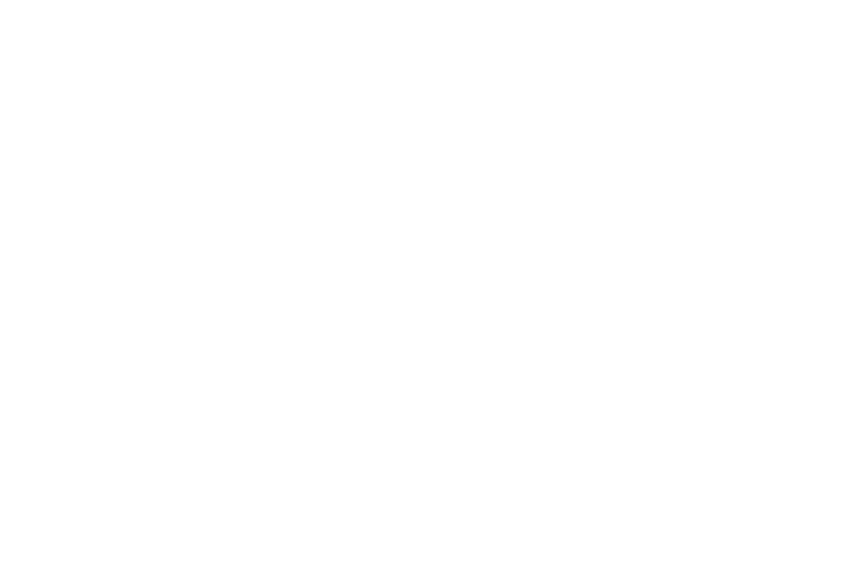

<IPython.core.display.Javascript object>


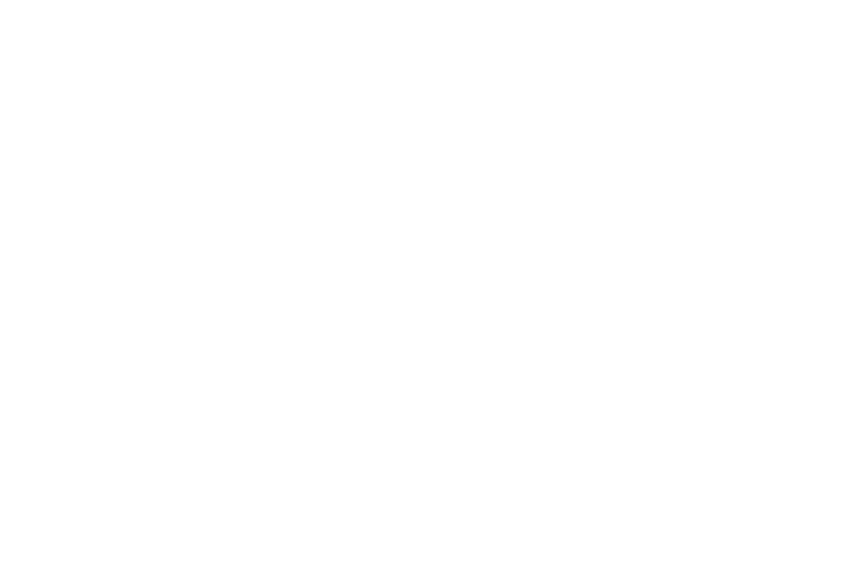

In [ ]:
plt.scatter(X_s_o[:,1].ravel(),X_s_o[:,2].ravel(),c=map_col)
plt.ylabel("Salario Estimado")
plt.xlabel("Edad")
plt.title("Gráfica de dispersión de los datos")
plt.show()


In [ ]:
pesos = descenso_grandiente_bw(X_s_o,y)

In [ ]:
pesos

array([[-1.13812197],
       [ 2.44457954],
       [ 1.22258176]])

Podemos ver arriba el resultado que obtuvimos para los parámetros $w$. El coeficiente independiente es $-1.13812197$, el coeficiente de la variable "Edad" es $2.44457954$ y finalmente el coeficiente de la variable "Salario estimado" es $1.22258176$. Para encontrar la recta de separación del clasificador que construimos usando regresión logística debemos igualar a 0 el argumento de la función logística, es decir:

$$1.22258176"Salario\,estimado" +\, 2.44457954"Edad" -1.13812197 = 0 $$

Despejando obtenemos:

$$"Salario\, Estimado" = \frac{-2.44457954}{1.22258176}"Edad" + \frac{1.13812197}{1.22258176}$$

esta es nuestra recta de separacion que obtuvimos con el clasificador. A continuación se realizan las gráficas.

In [ ]:
dominio_recta = np.linspace(-2,2,1000)

In [ ]:
y_recta = -dominio_recta*(2.44457954/1.22258176) + (1.13812197/1.22258176)

<IPython.core.display.Javascript object>


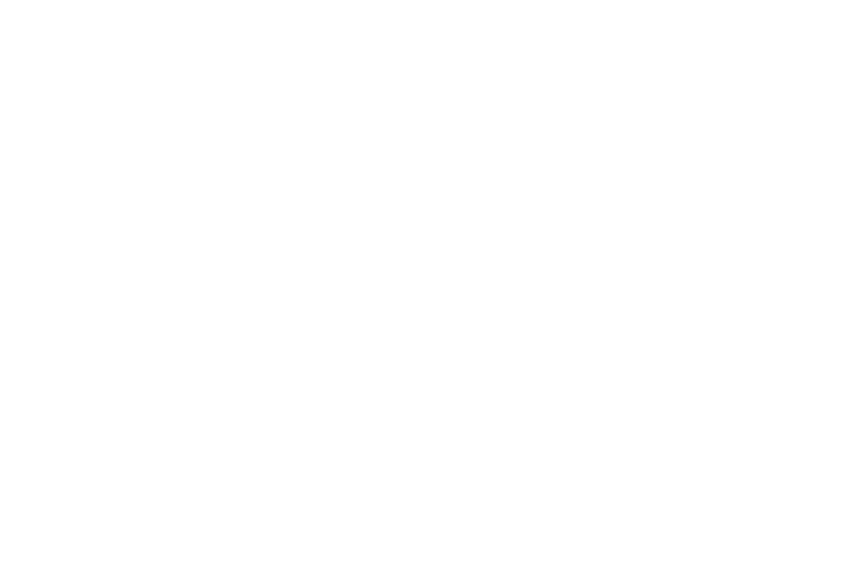

<IPython.core.display.Javascript object>


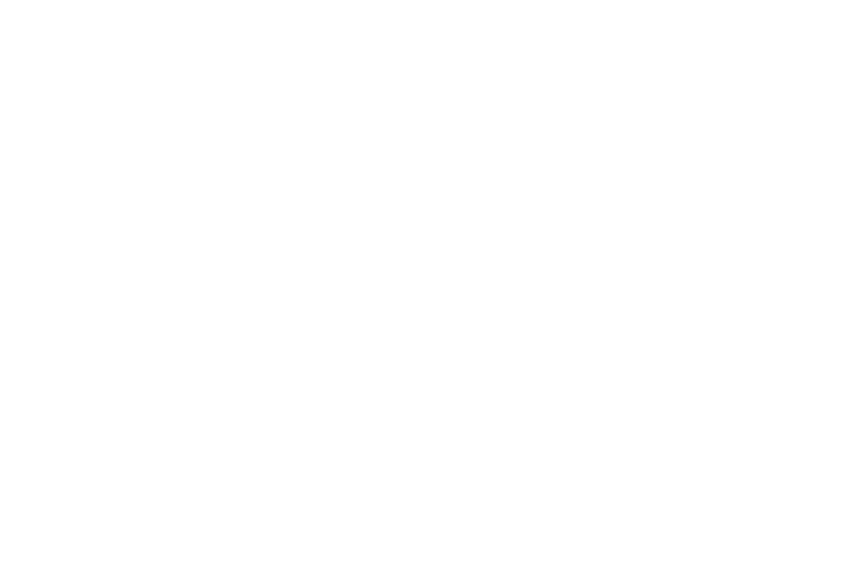

In [ ]:
plt.scatter(X_s_o[:,1].ravel(),X_s_o[:,2].ravel(),c=map_col)
plt.plot(dominio_recta,y_recta, c="green", label="Recta de separación")
plt.ylabel("Salario Estimado")
plt.xlabel("Edad")
plt.title("Gráfica de dispersión de los datos")
plt.legend()
plt.show()

In [ ]:
def predicciones(X,w):
    pred = sigmoide(X@w)
    pred = pred.ravel()
    etiquetas = []
    for i in pred:
        if i>0.5:
            etiquetas.append(1)
        else:
            etiquetas.append(0)
    return etiquetas
    

In [ ]:
pred = predicciones(X_s_o,pesos)

In [ ]:
pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,


In [ ]:
colo_pred = mapa_colores(pred)

<IPython.core.display.Javascript object>


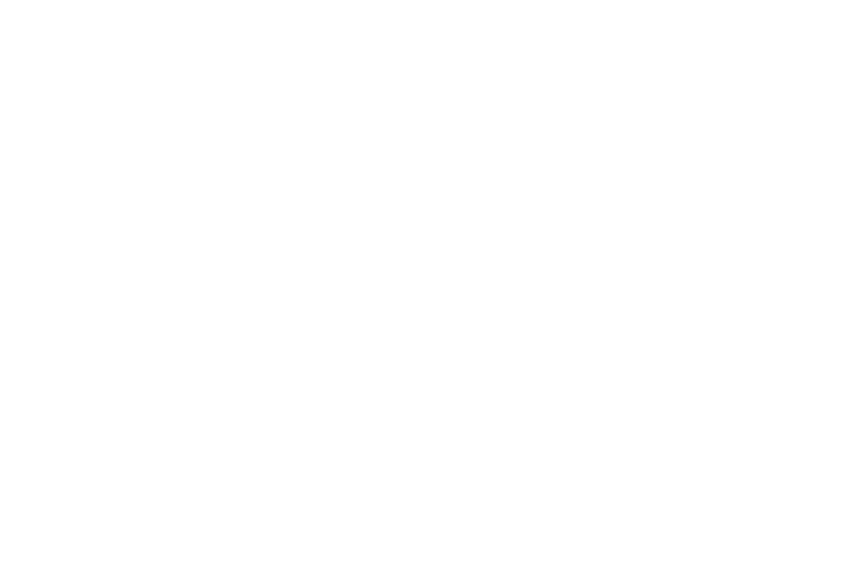

<IPython.core.display.Javascript object>


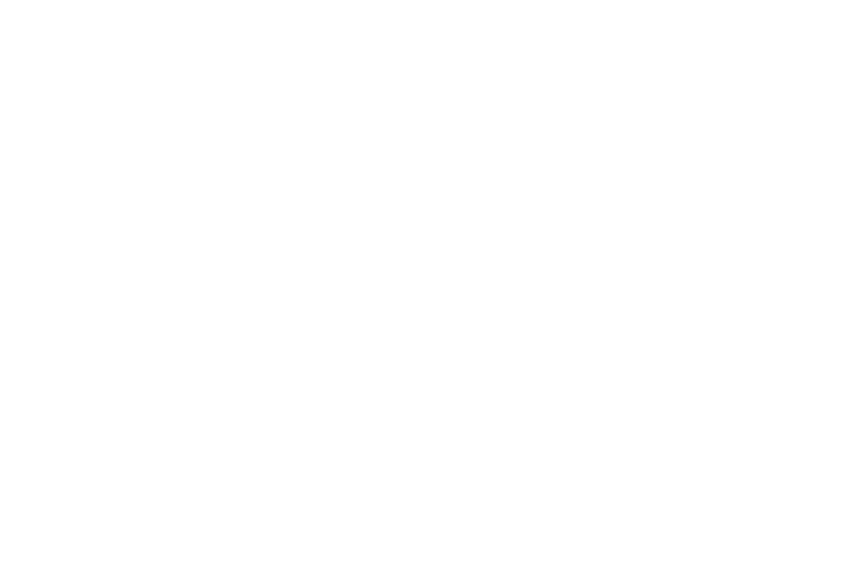

In [ ]:
plt.scatter(X_s_o[:,1].ravel(),X_s_o[:,2].ravel(),c=colo_pred)
plt.plot(dominio_recta,y_recta, c="green", label="Recta de separación")
plt.ylabel("Salario Estimado")
plt.xlabel("Edad")
plt.title("Gráfica de dispersión de los datos")
plt.legend()
plt.show()

# Usando scikit-learn 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression(fit_intercept=False)

In [ ]:
LR.fit(X_s_o,y.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
LR.coef_

array([[-1.05822686,  2.24804   ,  1.12654464]])

In [ ]:
pesos

array([[-1.13812197],
       [ 2.44457954],
       [ 1.22258176]])

In [ ]:
pred_2 = LR.predict(X_s_o)

In [ ]:
pred_2


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,

In [ ]:
mapa_colores_2 = mapa_colores(pred_2)

In [ ]:
y_recta_2 = -dominio_recta*(2.24804/1.12654464) + (1.05822686/1.12654464)

<IPython.core.display.Javascript object>


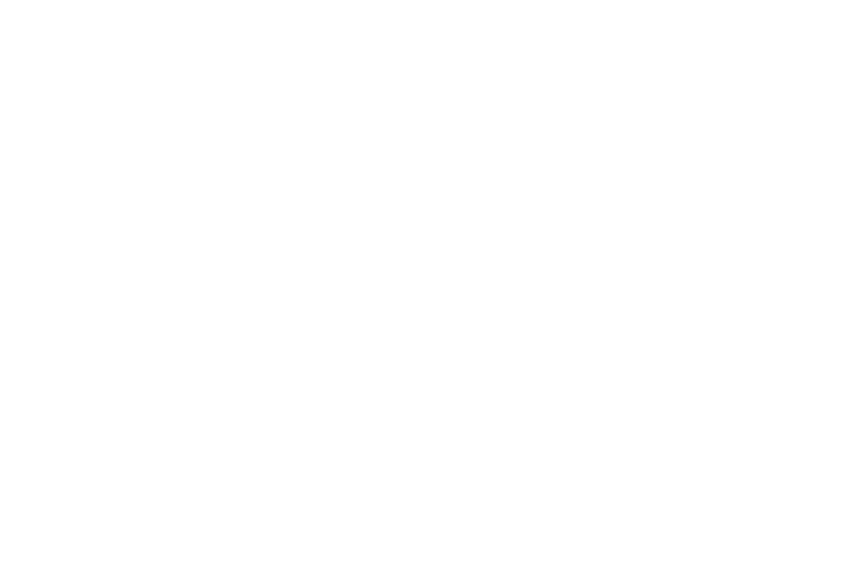

<IPython.core.display.Javascript object>


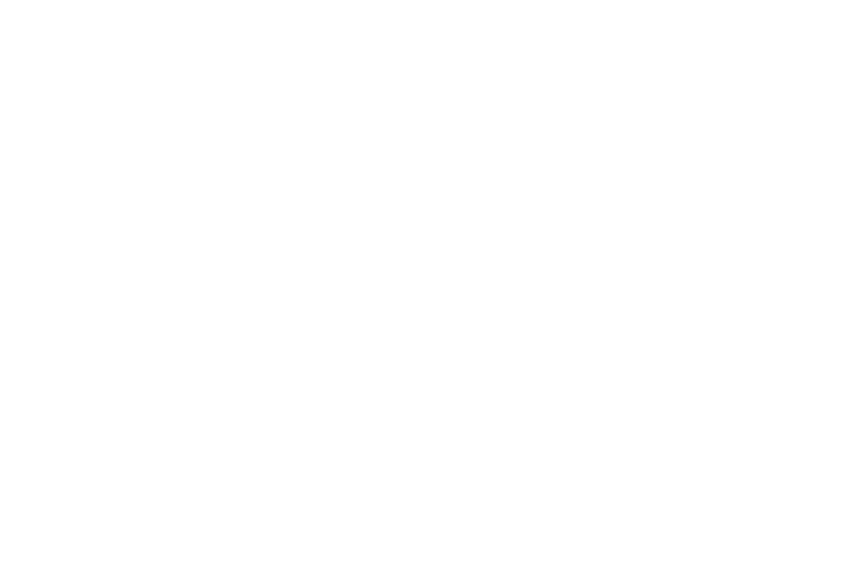

In [ ]:
plt.scatter(X_s_o[:,1].ravel(),X_s_o[:,2].ravel(),c=mapa_colores_2)
plt.plot(dominio_recta,y_recta_2, c="green", label="Recta de separación")
plt.ylabel("Salario Estimado")
plt.xlabel("Edad")
plt.title("Gráfica de dispersión de los datos")
plt.legend()
plt.show()

## Matriz de confusión.

La matriz de confusión $C$ es aquella donde $C_{ij}$ es el número de resultados que tienen etiqueta $i$ y se predijo etiqueta $j$

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y,pred_2)

array([[237,  20],
       [ 43, 100]])

In [ ]:
precision = 337/400

In [ ]:
precision

0.8425

# Ejemplo de regresión logística para un conjunto de datos no linealmente separable.

Vamos a ver un ejemplo de como podemos realizar regresion logística para un conjunto no linealmente separable a pesar de que la regresión logística es un clasificador lineal.

Primero comencemos observando nuestro conjunto de datos.


|       X       	|       Y       	| clasificación 	|
|:-------------:	|:-------------:	|---------------	|
| -0.6861007046 	| -2.7317977268 	| FALSO         	|
|  0.1845728382 	|  0.451296404  	| VERDADERO     	|
| -2.3158346172 	| -0.6509207096 	| FALSO         	|
| -1.0254515503 	| -0.0809364635 	| VERDADERO     	|
|  0.4311453719 	|  0.8026880194 	| VERDADERO     	|
| -3.7719061095 	|  0.814367149  	| FALSO         	|
|  0.8427785188 	| -1.0716033783 	| VERDADERO     	|
|  2.2864584569 	| -2.9176860601 	| FALSO         	|
| -0.2791914176 	| -0.8346607406 	| VERDADERO     	|
| -0.9005654622 	| -2.2787579969 	| FALSO         	|
|  0.1421184987 	|  -1.213108765 	| VERDADERO     	|
| 3.1509795878  	| -3.7415509261 	| FALSO         	|
| 0.6174679771  	| -0.5790232979 	| VERDADERO     	|
| 2.0068530366  	| -1.4894149248 	| FALSO         	|
| 3.5943855252  	| -0.8032932784 	| FALSO         	|


In [5]:
X_3 = np.array([-0.6861007046,0.1845728382,-2.3158346172,-1.0254515503,0.4311453719,-3.7719061095,0.8427785188,2.2864584569,-0.2791914176,-0.9005654622,0.1421184987,3.1509795878,0.6174679771,2.0068530366,3.5943855252])

In [6]:
Y_3 = np.array([-2.7317977268,0.451296404,-0.6509207096,-0.0809364635,0.8026880194,0.814367149,-1.0716033783,-2.9176860601,-0.8346607406,-2.2787579969,-1.213108765,-3.7415509261,-0.5790232979,-1.4894149248,-0.8032932784])

In [7]:
#En lugar de Verdadero y Falso utilizamos 1 y 0
clasificacion = np.array([0,1,0,1,1,0,1,0,1,0,1,0,1,0,0])

In [8]:
mapa_colores_3 = mapa_colores(clasificacion)

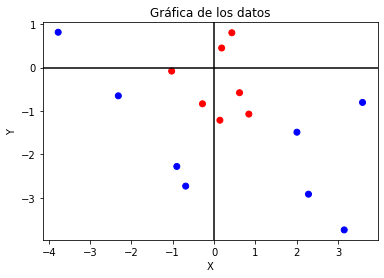

In [9]:
plt.scatter(X_3,Y_3, c=mapa_colores_3)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gráfica de los datos")
plt.axvline(x=0, c="black")
plt.axhline(y=0, c="black")
plt.show()

Como se puede observar, podemos encerrar los puntos rojos dentro de una cónica que podría ser una circunferencia o una elipse.

En general, el polinomio de segundo grado en términos de las variables $x$ y $y$ es:
$$Ax^2+By^2+Cxy+Dx+Fy+G$$

Si observamos la gráfica, se puede notar que para encerrar los puntos rojos se puede utilizar una cónica centrada en el origen, por lo que se pueden omitir los términos lineales, quedando el polinomio de la siguiente forma:

$$Ax^2+By^2+Cxy+D$$

Se listaran las características derivadas para ambos polinomios.

In [10]:
x_cuad = (X_3**2).reshape(-1,1)

In [11]:
y_cuad = (Y_3**2).reshape(-1,1)


In [12]:
xy = (X_3*Y_3).reshape(-1,1)

In [ ]:
X_pol_red = np.concatenate((x_cuad,y_cuad,xy,), axis = 1)

In [ ]:
X_pol_red

array([[ 4.70734177e-01,  7.46271882e+00,  1.87428835e+00],
       [ 3.40671326e-02,  2.03668444e-01,  8.32970582e-02],
       [ 5.36308997e+00,  4.23697770e-01,  1.50742471e+00],
       [ 1.05155088e+00,  6.55071112e-03,  8.29964220e-02],
       [ 1.85886332e-01,  6.44308056e-01,  3.46075225e-01],
       [ 1.42272757e+01,  6.63193853e-01, -3.07171642e+00],
       [ 7.10275632e-01,  1.14833380e+00, -9.03124308e-01],
       [ 5.22789228e+00,  8.51289195e+00, -6.67116797e+00],
       [ 7.79478477e-02,  6.96658552e-01,  2.33030115e-01],
       [ 8.11018152e-01,  5.19273801e+00,  2.05217075e+00],
       [ 2.01976677e-02,  1.47163288e+00, -1.72405196e-01],
       [ 9.92867236e+00,  1.39992033e+01, -1.17895506e+01],
       [ 3.81266703e-01,  3.35267980e-01, -3.57528344e-01],
       [ 4.02745911e+00,  2.21835682e+00, -2.98903686e+00],
       [ 1.29196073e+01,  6.45280091e-01, -2.88734573e+00]])

In [ ]:
X_pol_com = np.concatenate((x_cuad,y_cuad,xy,X_3.reshape(-1,1),Y_3.reshape(-1,1)), axis = 1)

In [ ]:
X_pol_com

array([[ 4.70734177e-01,  7.46271882e+00,  1.87428835e+00,
        -6.86100705e-01, -2.73179773e+00],
       [ 3.40671326e-02,  2.03668444e-01,  8.32970582e-02,
         1.84572838e-01,  4.51296404e-01],
       [ 5.36308997e+00,  4.23697770e-01,  1.50742471e+00,
        -2.31583462e+00, -6.50920710e-01],
       [ 1.05155088e+00,  6.55071112e-03,  8.29964220e-02,
        -1.02545155e+00, -8.09364635e-02],
       [ 1.85886332e-01,  6.44308056e-01,  3.46075225e-01,
         4.31145372e-01,  8.02688019e-01],
       [ 1.42272757e+01,  6.63193853e-01, -3.07171642e+00,
        -3.77190611e+00,  8.14367149e-01],
       [ 7.10275632e-01,  1.14833380e+00, -9.03124308e-01,
         8.42778519e-01, -1.07160338e+00],
       [ 5.22789228e+00,  8.51289195e+00, -6.67116797e+00,
         2.28645846e+00, -2.91768606e+00],
       [ 7.79478477e-02,  6.96658552e-01,  2.33030115e-01,
        -2.79191418e-01, -8.34660741e-01],
       [ 8.11018152e-01,  5.19273801e+00,  2.05217075e+00,
        -9.00565462e-01

Lo que se va a hacer es aplicar la regresión logística para ajustar un plano en el espacio transformado, en este espacio los datos parecen ser linealmente separables por lo que la regresión logística pueder ser aplicada. Posteriormente se regresará al espacio original. Visualizamos el espacio del polinomio reducido.

In [ ]:
LR_pol_red= LogisticRegression(random_state=0)

In [ ]:
LR_3_pol_com = LogisticRegression(random_state=0)

In [ ]:
LR_3_pol_com.fit(X_pol_com,clasificacion)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
LR_pol_red.fit(X_pol_red,clasificacion)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
LR_3_pol_com.coef_

array([[-0.9982553 , -0.81040165, -0.08841183,  0.11279143,  0.34631702]])

In [ ]:
LR_pol_red.coef_

array([[-1.02269076, -0.89928894, -0.13570288]])

In [ ]:
LR_pol_red.intercept_

array([3.84809304])

In [ ]:
LR_3_pol_com.intercept_

array([4.01890325])

In [ ]:
pesos_red = LR_pol_red.coef_.ravel()

In [ ]:
ord_or_red = LR_pol_red.intercept_[0]

In [ ]:
ord_or_red

3.8480930429964113

In [ ]:
pesos_com = LR_3_pol_com.coef_.ravel()

In [ ]:
ord_or_com = LR_3_pol_com.intercept_[0]

Arriba se dieron las ecuaciones obtenidas para los planos, a continuación estas se escriben usando las coordenadas $x$ y $y$, es decir, sustituyendo las $x_i$.

Del primer plano (aquel con 5 coordenadas) se obtiene la expresión:

$$-0.9982553x^2-0.81040165y^2-0.08841183xy+0.11279143x+0.34631702y + 4.01890325 = 0$$

Del segundo plano ( aquel con tres coordenadas) se obtiene la expresión:

$$-1.02269076x^2-0.89928894y^2-0.13570288xy + 3.84809304=0$$

Estas son las expresiones obtenidas en el espacio original.

Calculamos los discriminantes 
$B^2-4AC$, en donde $A$ es el coeficiente de la $x^2$, $B$ el de $xy$ y $C$ el de $y^2$

In [ ]:
determinante_1 = pesos_com[2]**2 -4*pesos_com[0]*pesos_com[1]

In [ ]:
determinante_1

-3.228134322735206

In [ ]:
determinante_2 = pesos_red[2]**2 -4*pesos_red[0]*pesos_red[1]

In [ ]:
determinante_2

-3.660362665598695

Al ser ambos discriminantes negativos podemos decir que ambas expresiones corresponden a elipses. Como las dos tienen término $xy$ entonces son elipses rotadas. En la primera expresión la elipse no está centrada en el origen, pero si cerca, en la segunda si se encuentra centrada en el origen.

Hagamos una gráfica de los puntos en el espacio del polinomio reducido junto con el plano de ajuste obtenido por la regresión logística.

In [ ]:
X_cuad,Y_cuad = np.meshgrid(x_cuad,y_cuad)

In [ ]:
X_cuad

array([[ 0.47073418,  0.03406713,  5.36308997,  1.05155088,  0.18588633,
        14.2272757 ,  0.71027563,  5.22789228,  0.07794785,  0.81101815,
         0.02019767,  9.92867236,  0.3812667 ,  4.02745911, 12.9196073 ],
       [ 0.47073418,  0.03406713,  5.36308997,  1.05155088,  0.18588633,
        14.2272757 ,  0.71027563,  5.22789228,  0.07794785,  0.81101815,
         0.02019767,  9.92867236,  0.3812667 ,  4.02745911, 12.9196073 ],
       [ 0.47073418,  0.03406713,  5.36308997,  1.05155088,  0.18588633,
        14.2272757 ,  0.71027563,  5.22789228,  0.07794785,  0.81101815,
         0.02019767,  9.92867236,  0.3812667 ,  4.02745911, 12.9196073 ],
       [ 0.47073418,  0.03406713,  5.36308997,  1.05155088,  0.18588633,
        14.2272757 ,  0.71027563,  5.22789228,  0.07794785,  0.81101815,
         0.02019767,  9.92867236,  0.3812667 ,  4.02745911, 12.9196073 ],
       [ 0.47073418,  0.03406713,  5.36308997,  1.05155088,  0.18588633,
        14.2272757 ,  0.71027563,  5.22789228, 

In [ ]:
Y_cuad

array([[7.46271882e+00, 7.46271882e+00, 7.46271882e+00, 7.46271882e+00,
        7.46271882e+00, 7.46271882e+00, 7.46271882e+00, 7.46271882e+00,
        7.46271882e+00, 7.46271882e+00, 7.46271882e+00, 7.46271882e+00,
        7.46271882e+00, 7.46271882e+00, 7.46271882e+00],
       [2.03668444e-01, 2.03668444e-01, 2.03668444e-01, 2.03668444e-01,
        2.03668444e-01, 2.03668444e-01, 2.03668444e-01, 2.03668444e-01,
        2.03668444e-01, 2.03668444e-01, 2.03668444e-01, 2.03668444e-01,
        2.03668444e-01, 2.03668444e-01, 2.03668444e-01],
       [4.23697770e-01, 4.23697770e-01, 4.23697770e-01, 4.23697770e-01,
        4.23697770e-01, 4.23697770e-01, 4.23697770e-01, 4.23697770e-01,
        4.23697770e-01, 4.23697770e-01, 4.23697770e-01, 4.23697770e-01,
        4.23697770e-01, 4.23697770e-01, 4.23697770e-01],
       [6.55071112e-03, 6.55071112e-03, 6.55071112e-03, 6.55071112e-03,
        6.55071112e-03, 6.55071112e-03, 6.55071112e-03, 6.55071112e-03,
        6.55071112e-03, 6.55071112e-0

−1.02269076𝑥2−0.89928894𝑦2−0.13570288𝑥𝑦+3.84809304=0

In [ ]:
Z_red = (-1.02269076/0.13570288)*X_cuad +(-0.89928894/0.13570288)*Y_cuad+(3.84809304/0.13570288)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


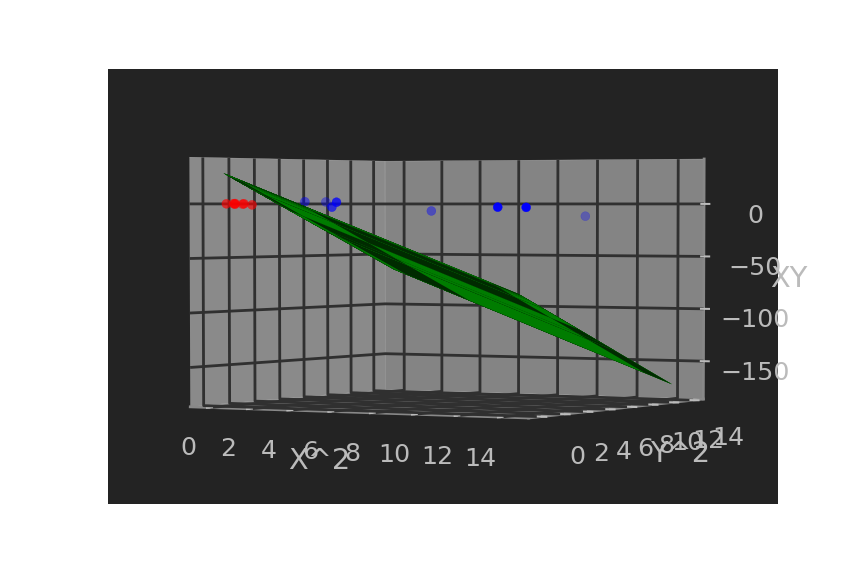

Text(0.5, 0, 'XY')

In [ ]:
%matplotlib notebook 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_cuad,y_cuad,xy, c = mapa_colores_3)
ax.plot_surface(X_cuad,Y_cuad,Z_red, color="green")
ax.set_xlabel("X^2")
ax.set_ylabel("Y^2")
ax.set_zlabel("XY")





Vamos a graficar ambas expresiones obtenidas. Para hacerlo se graficara con un contourplot, es decir, una curva de nivel en cero que es a lo que están igualadas nuestras expresiones.

In [ ]:
dom_niv = np.linspace(-5,5, 1000)

In [ ]:
X_niv,Y_niv = np.meshgrid(dom_niv,dom_niv)

In [ ]:
Z_niv = (-1.02269076)*(X_niv**2)+(-0.89928894)*(Y_niv**2)+(-0.13570288)*(X_niv*Y_niv)+3.84809304

−1.02269076𝑥2−0.89928894𝑦2−0.13570288𝑥𝑦+3.84809304=0

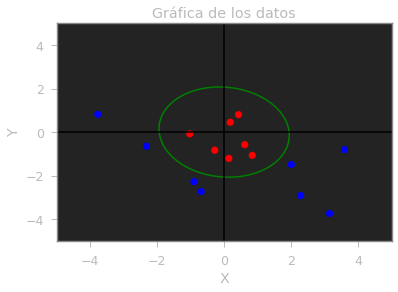

In [ ]:
%matplotlib inline
plt.scatter(X_3,Y_3, c=mapa_colores_3)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gráfica de los datos")
plt.axvline(x=0, c="black")
plt.axhline(y=0, c="black")
plt.contour(X_niv,Y_niv,Z_niv,[0], colors=["green"])
plt.show()